In [1]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [5]:
pip install nltk

In [6]:
# 2. Load Datasets
true_df = pd.read_csv('True.csv')
fake_df = pd.read_csv('Fake.csv')

In [7]:
# 3. Add Labels: 1 for Real, 0 for Fake
true_df['label'] = 1
fake_df['label'] = 0

In [8]:
#  4. Merge the datasets
df = pd.concat([true_df, fake_df], ignore_index=True)

In [9]:
#  5. Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [10]:
# 6. Check balance
print(df['label'].value_counts())

label
0    16919
1     9631
Name: count, dtype: int64


In [11]:
# 7. Basic Text Cleaning Function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

In [13]:
# 8. Apply cleaning on "text" column
df['clean_text'] = df.iloc[:, 0].apply(lambda x: clean_text(x))

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [17]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['processed_text'] = df['clean_text'].apply(preprocess)

In [19]:
# 10. Preview Cleaned Data
print(df.iloc[:, 0].head()) # Display the first column
print(df[['clean_text', 'processed_text']].head())

0    Macedonian court sentences ex-secret police of...
1                                                  NaN
2    South Korea's Moon asks Russia to continue sup...
3                                                  NaN
4                                                  NaN
Name: e of three states on Mexico s Yucatan Peninsula, dtype: object
                                          clean_text                                     processed_text
0  macedonian court sentences exsecret police off...  macedonian court sentence exsecret police offi...
1                                                nan                                                nan
2  south koreas moon asks russia to continue supp...  south korea moon asks russia continue supporti...
3                                                nan                                                nan
4                                                nan                                                nan


In [20]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Define features and labels
X = df['processed_text']
y = df['label']

In [22]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [24]:
# Model Training (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [25]:
# Evaluation
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3384
           1       1.00      1.00      1.00      1926

    accuracy                           1.00      5310
   macro avg       1.00      1.00      1.00      5310
weighted avg       1.00      1.00      1.00      5310



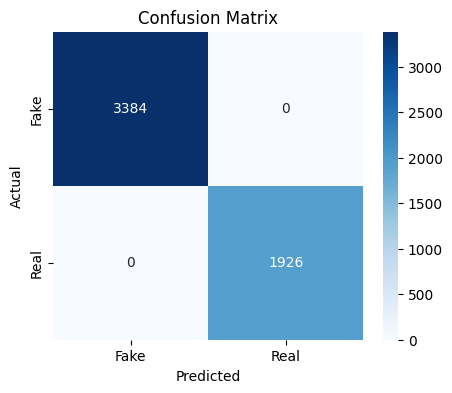

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [28]:
# Save the model and vectorizer
joblib.dump(model, 'fake_news_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print(" Model and vectorizer saved successfully!")


 Model and vectorizer saved successfully!
